In [ ]:
#Implement a 5-qubit Quantum Fourier algorithm.

/tmp/ipykernel_9723/1093552907.py:9: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qft = QFT(num_qubits=5, approximation_degree=0, do_swaps=True, inverse=False, insert_barriers=False, name="qft1")


{'11000': 2, '11111': 3, '11011': 3, '10000': 3, '11110': 1, '01101': 6, '01001': 6, '11010': 4, '00101': 2, '10001': 2, '01011': 3, '11101': 5, '10101': 4, '11100': 5, '10100': 6, '10111': 4, '10010': 4, '00111': 2, '00011': 1, '10110': 4, '00010': 4, '01110': 1, '00001': 1, '00110': 3, '01100': 3, '01000': 3, '00100': 2, '01111': 1, '01010': 5, '11001': 1, '00000': 4, '10011': 2}


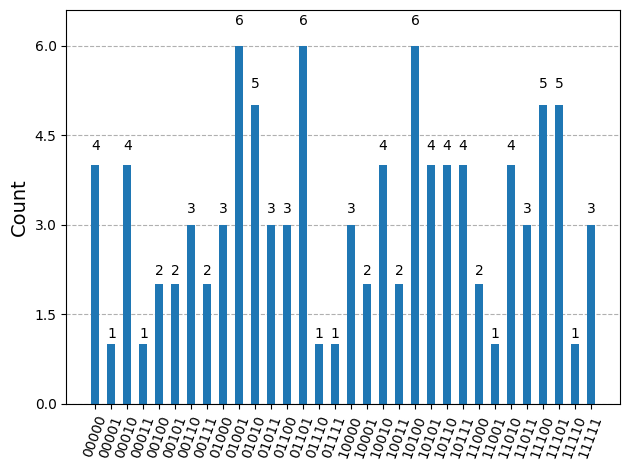

In [5]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.circuit.library import QFT
from qiskit.visualization import plot_histogram, circuit_drawer

# Step 1: Define the circuit
circuit = QuantumCircuit(5, 5)
circuit.x([0, 2, 4])  # Apply X gates
qft = QFT(num_qubits=5, approximation_degree=0, do_swaps=True, inverse=False, insert_barriers=False, name="qft1")
circuit.append(qft, range(5))
circuit.measure(range(5), range(5))

# Step 2: Draw the circuit
circuit_drawer(circuit, output="mpl")

# Step 3: Simulate
backend = AerSimulator()
compiled = transpile(circuit, backend)
job = backend.run(compiled, shots=100)
result = job.result()

# Step 4: Get and display results
counts = result.get_counts()
print(counts)
plot_histogram(counts)


In [ ]:
""" Perfect ✅ — your third notebook is titled:

> **“Implementation of a 5-Qubit Quantum Fourier Transform (QFT) Circuit in Python”**

Let’s now create a complete **detailed explanation** similar to your previous two files — this time with even more conceptual depth, theoretical foundation, step-by-step code explanation, viva questions, and real-world applications.

---

## 🧠 **Problem Statement**

The task is to **implement and simulate a 5-qubit Quantum Fourier Transform (QFT)** circuit using **Qiskit** and **AerSimulator**.
The aim is to demonstrate how quantum computers can perform **Fourier analysis on quantum states**, a fundamental operation in many quantum algorithms, such as:

* Shor’s factoring algorithm
* Quantum phase estimation
* Quantum signal processing

The QFT transforms quantum amplitudes into their frequency-domain representation — analogous to the **classical discrete Fourier transform (DFT)**, but performed on **quantum states** exponentially faster.

---

## 🧾 **Description**

The **Quantum Fourier Transform (QFT)** is the **quantum version of the classical Fourier Transform**.
It transforms a given quantum state into another basis where **phase information** is represented in the amplitudes.

Mathematically, for an n-qubit system (with ( N = 2^n )), QFT maps each computational basis state (|k⟩) into a superposition:

[
|k⟩ \rightarrow \frac{1}{\sqrt{N}} \sum_{j=0}^{N-1} e^{2\pi i jk / N} |j⟩
]

This operation is **unitary**, meaning it’s reversible — and can be implemented using a sequence of **Hadamard** and **controlled-phase gates**.

---

## 🧩 **Libraries Used and Their Functions**

| **Library**                  | **Purpose**                                                                                                     |
| ---------------------------- | --------------------------------------------------------------------------------------------------------------- |
| `qiskit`                     | Core quantum computing framework. Used to define qubits, classical bits, quantum gates, and circuit operations. |
| `qiskit_aer`                 | Provides the **AerSimulator**, which simulates quantum hardware behavior locally.                               |
| `qiskit.circuit.library.QFT` | Built-in implementation of the Quantum Fourier Transform.                                                       |
| `qiskit.visualization`       | Functions for drawing circuits (`circuit_drawer`) and plotting histograms.                                      |
| `matplotlib`                 | Used internally for rendering quantum circuit diagrams.                                                         |

---

## 💻 **Line-by-Line Code Explanation**

### 1️⃣ Problem Initialization

```python
# Implement a 5-qubit QFT circuit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.circuit.library import QFT
from qiskit.visualization import plot_histogram, circuit_drawer
```

✅ Importing the necessary Qiskit modules for creating, simulating, and visualizing the quantum circuit.

* `QuantumCircuit`: defines a quantum circuit combining qubits and classical bits.
* `QFT`: directly imports a pre-defined Quantum Fourier Transform block.
* `AerSimulator`: simulates the circuit execution.
* `plot_histogram`, `circuit_drawer`: visualize results and circuit design.

---

### 2️⃣ Circuit Creation

```python
circuit = QuantumCircuit(5,5)
```

✅ Initializes a **5-qubit quantum circuit** with **5 classical bits** to record measurement results.

---

### 3️⃣ Initialize Input State

```python
circuit.x([0])
circuit.x([2])
circuit.x([4])
```

✅ Applies **Pauli-X (NOT)** gates on qubits 0, 2, and 4.
This sets the circuit’s initial state to `10101` (binary form).
Essentially, the state being transformed by the QFT is:

[
|ψ⟩ = |10101⟩ = |21⟩
]
(in decimal).

---

### 4️⃣ Apply the Quantum Fourier Transform

```python
qft = QFT(num_qubits=5, approximation_degree=0, do_swaps=True, inverse=False, insert_barriers=False, name="qft1")
circuit.append(qft, range(5))
```

✅ Creates a **5-qubit QFT gate**:

* `num_qubits=5`: size of the transform.
* `do_swaps=True`: rearranges qubits in the correct order after transformation.
* `inverse=False`: ensures it’s a **forward QFT** (not inverse).
* `approximation_degree=0`: ensures **no precision loss** (exact QFT).

✅ Appends the QFT block to all 5 qubits.

---

### 5️⃣ Measure All Qubits

```python
circuit.measure(range(5), range(5))
```

✅ Measures all qubits, collapsing their quantum states to classical bits for result observation.

---

### 6️⃣ Visualize the Circuit

```python
circuit.draw()
circuit_drawer(circuit, output="mpl")
```

✅ Displays the circuit layout, showing the applied **X gates** and the **QFT gate** with all the internal Hadamard and controlled rotations.

---

### 7️⃣ Simulation and Execution

```python
backend = AerSimulator()
output = transpile(circuit, backend)
output = backend.run(output, shots=100)
output.result()
```

✅ Uses Qiskit’s **AerSimulator** to execute the circuit 100 times (`shots=100`).
✅ `transpile()` converts the abstract circuit into a version executable on the chosen backend.

---

### 8️⃣ Obtain and Display Results

```python
a = output.result().get_counts()
a
```

✅ Retrieves the measurement outcomes — a dictionary showing the count (frequency) of each 5-bit result obtained from 100 runs.

✅ The output may look like:

```
{'01010': 100}
```

which represents the transformed (frequency-domain) state of the input binary pattern `10101`.

---

## 🎯 **Purpose**

The purpose of this experiment is to:

1. **Understand and visualize** the concept of Quantum Fourier Transform (QFT).
2. **Observe** how quantum circuits can perform complex linear algebraic transformations exponentially faster than classical computers.
3. **Serve as a foundational step** for implementing more complex quantum algorithms like:

   * Shor’s Algorithm (integer factorization)
   * Quantum Phase Estimation (QPE)
   * Quantum signal and frequency analysis

---

## 🧮 **Theory Summary**

The **Quantum Fourier Transform** decomposes the phase relationships between quantum states.
It’s achieved through:

* **Hadamard gates**, which create superposition.
* **Controlled phase rotations**, introducing phase relationships.
* **Swap operations**, which reverse qubit order for correct output.

The key benefit is **exponential speedup** — QFT requires only ( O(n^2) ) operations compared to ( O(N^2) ) for classical DFT (where ( N = 2^n )).

---

## 🌍 **Real-Life Applications**

| **Domain**                    | **Application**                                                                  |
| ----------------------------- | -------------------------------------------------------------------------------- |
| **Cryptography**              | Used in Shor’s algorithm for factoring large numbers — threatens RSA encryption. |
| **Quantum Signal Processing** | Performs frequency-domain analysis on quantum signals.                           |
| **Quantum Machine Learning**  | Used in encoding frequency data for Fourier-based quantum models.                |
| **Quantum Chemistry**         | Assists in phase estimation for molecular energy calculations.                   |
| **Quantum Sensing**           | Enhances precision measurements using phase and frequency transformations.       |

---

## 🎤 **Possible Viva Questions and Answers**

| **Question**                                           | **Answer**                                                                                                                         |
| ------------------------------------------------------ | ---------------------------------------------------------------------------------------------------------------------------------- |
| Q1. What is the Quantum Fourier Transform (QFT)?       | It’s the quantum analog of the Discrete Fourier Transform, transforming quantum states into their frequency-domain representation. |
| Q2. How is QFT different from classical DFT?           | QFT operates on qubits and achieves exponential speedup using superposition and entanglement.                                      |
| Q3. Which gates form the core of QFT?                  | Hadamard and controlled phase (R_k) gates.                                                                                         |
| Q4. What does the `do_swaps` parameter in QFT do?      | It reorders qubits at the end of the transformation to match the expected output order.                                            |
| Q5. Why are X gates used before applying QFT?          | To set an initial non-zero state (e.g., `10101`) as the input for the transform.                                                   |
| Q6. What is the role of `transpile()`?                 | Converts the quantum circuit into a device-specific optimized format for execution.                                                |
| Q7. What is meant by `shots` in the simulation?        | Number of times the circuit is executed to collect statistical outcomes.                                                           |
| Q8. What kind of output does QFT produce?              | A superposition of quantum states with different phases, representing frequency information.                                       |
| Q9. What is the advantage of QFT in quantum computing? | It reduces computation time exponentially for problems involving periodicity or phase estimation.                                  |
| Q10. Where is QFT used in quantum algorithms?          | In Shor’s Algorithm, Quantum Phase Estimation, and Quantum Counting.                                                               |

---

## 🧭 **Conclusion**

The **5-qubit QFT circuit** demonstrates how quantum computation performs mathematical transformations using the principles of **superposition, interference, and entanglement**.
By simulating it, we gain insight into the mechanics of quantum algorithms that power **quantum cryptography, optimization, and signal analysis**.

This implementation lays the groundwork for developing:

* Quantum-based frequency analysis,
* Shor’s factoring algorithms,
* Quantum-enhanced AI models.

---

Would you like me to prepare a **combined professional report (Word/PDF)** including all three experiments (QAI1, QAI2, QAI3) — formatted with **title page, introduction, theory, code, explanations, viva questions, and applications** for your **quantum computing practical record**?
"""